# Term Project

## Christina Vosnak

## November 17th, 2024

##  Milestone 1: Data Selection and EDA

### Project Description

As an HR professional whose job focuses primarily on talent acquisition, our team often wants to know why employees leave their current company to pursue other opportunities. Is it because of better opportunities? Is it because of company culture? Is it because of job satisfaction? Is it because of salary? Is it a variable we never even though about?  While I cannot collect exit survey data from my company directly, I found a dataset on Kaggle that analyzes employee attrition amongst a number of factors including age, salary, time with the company, and job position, and length of commute just to name a few. I will utilize this fictional dataset to build a model that will predetermine the likelihood of an employee leaving the company to aid human resources teams to make informed decisions on improving retention rates. HRBP’s will be able to reevaluate salaries if employees think they are being paid unfairly and organizational effectiveness officers will be able to conduct surveys to improve employee satisfaction.

For this project, I will analyze the dataset by preparing it for model building. I will fill in missing data, filter out irrelevant columns and perform various visualizations on the data to show trends regarding attrition. I will then perform a classification analysis and attempt to build a model that accurately predicts if an employee will leave a company based on certain values. Below is just a simple graph analysis of the data in its rawest form to understand some of the variables that this dataset looks at. 

### Graph Analysis

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
data = pd.read_csv('data/employee_attrition_data.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


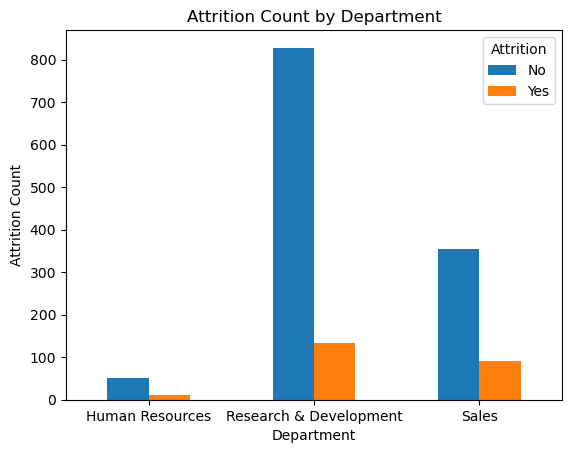

In [3]:
# Graph 1: Attrition Comparison By Department

# Group by 'Department' and count occurrences of Attrition captured by a pivot table
department_pivot_table = data.pivot_table(values='EmployeeNumber', index='Department', columns='Attrition', aggfunc='count')

# Plot Table
department_pivot_table.plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Attrition Count')
plt.title('Attrition Count by Department')
plt.xticks(rotation=0)
plt.show()

This graph shows that the Research & Development department has the highest attrition rate. With this information, we can look further into employee satisfaction rates within this team and their salaries to see what other factors relate to attrition compared to other departments.

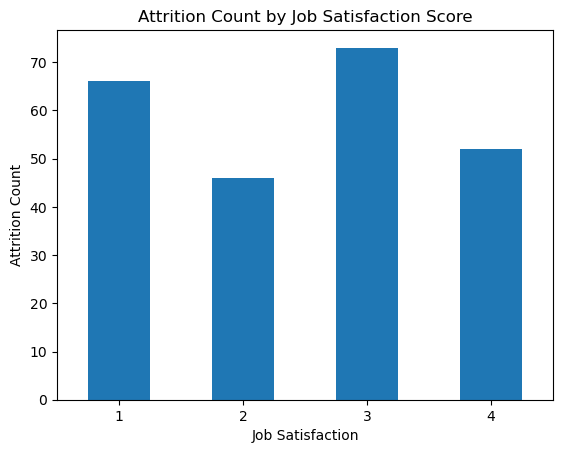

In [4]:
# Graph 2: Attrition vs. Job Satisfaction

# Group by 'JobSatisfaction' and count occurrences of Attrition captured by a pivot table
satisfaction_pivot_table = data.pivot_table(values='EmployeeNumber', index='JobSatisfaction', columns='Attrition', aggfunc='count')
satisfaction_pivot_table

# Plot Table
satisfaction_pivot_table['Yes'].plot(kind='bar')
plt.xlabel('Job Satisfaction')
plt.ylabel('Attrition Count')
plt.title('Attrition Count by Job Satisfaction Score')
plt.xticks(rotation=0)
plt.show()


In this graph, we see that there isn't a correlation between job satisfaction and attrition. It may be safe to assume that job satisfaction isn't a primary reason why employees leave this specific company.

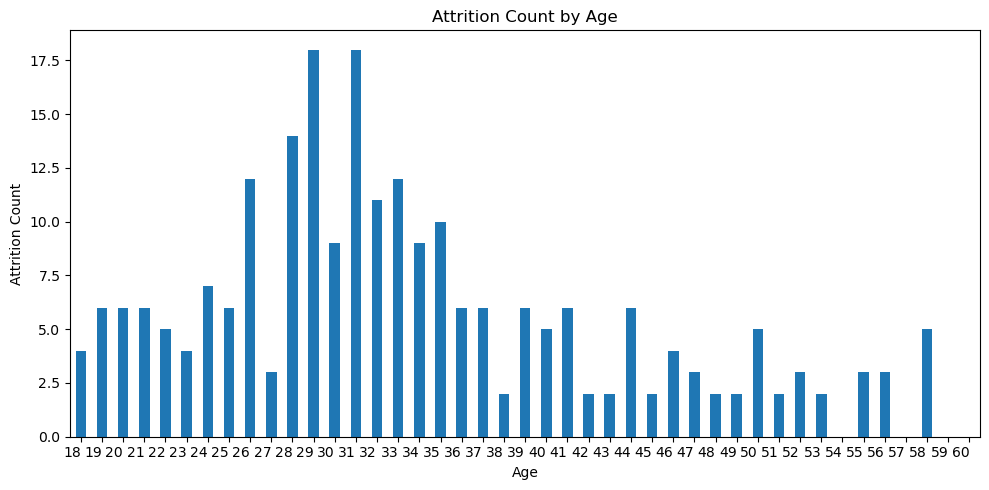

In [5]:
# Graph 3: Attrition by Age

# Group by 'Age' and count occurrences of Attrition captured by a pivot table
age_pivot_table = data.pivot_table(values='EmployeeNumber', index='Age', columns='Attrition', aggfunc='count')

# Plot Table
age_pivot_table['Yes'].plot(kind='bar', figsize=(10,5))
plt.xlabel('Age')
plt.ylabel('Attrition Count')
plt.title('Attrition Count by Age')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

This chart shows attrition by age. We see that the most amount of attrition occurs within the age range of 26-35. This makes sense as it is the perfect time in one's career to seek a promotion, move around, or want a different career change altogether. Whatever the reason may be, we can further analyze other attributes to understand why attrition amongst this age group is so high. 

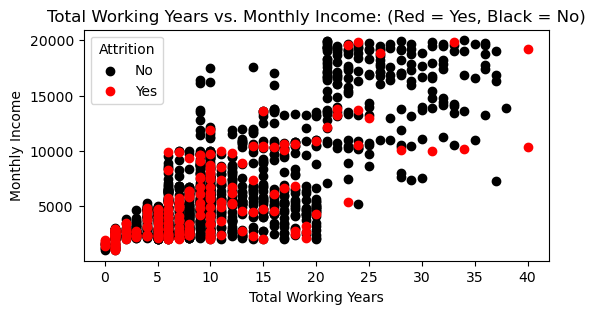

In [6]:
# Graph 4: Scatterplot of Monthly Income by Total Working Years

# Create a dictionary for plot colors
plt.figure(figsize=(6, 3)) 
colors = {'Yes': 'red', 'No': 'black'}

# Create the scatter plot
# Plot 'No' first
subset_no = data[data['Attrition'] == 'No']
plt.scatter(subset_no['TotalWorkingYears'], subset_no['MonthlyIncome'], 
            c=colors['No'], label='No')

# Plot 'Yes' second (this brings it to the front)
subset_yes = data[data['Attrition'] == 'Yes']
plt.scatter(subset_yes['TotalWorkingYears'], subset_yes['MonthlyIncome'], 
            c=colors['Yes'], label='Yes')
# Add title and labels
plt.title('Total Working Years vs. Monthly Income: (Red = Yes, Black = No)')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
    
# Show legend
plt.legend(title='Attrition')
    
# Show plot
plt.show()

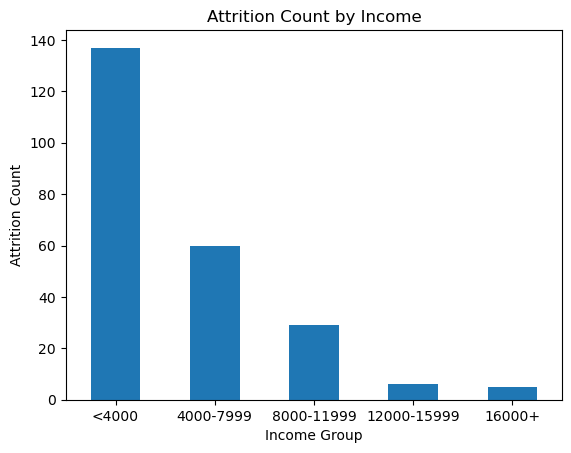

In [7]:
# Graph 5: Attrition by Monthly Income

# Create income bins for better visualization
income_bins = [0, 4000, 8000, 12000, 16000, 20000]  # Define income bins
income_labels = ['<4000', '4000-7999', '8000-11999', '12000-15999', '16000+']  # Define labels for bins

# Create a new column for income groups
data['IncomeGroup'] = pd.cut(data['MonthlyIncome'], bins=income_bins, labels=income_labels, right=False)

# Group by Income bins and count occurrences of Attrition captured by a pivot table
income_pivot_table = data.pivot_table(values='EmployeeNumber', index='IncomeGroup', columns='Attrition', aggfunc='count')

# Plot Table
income_pivot_table['Yes'].plot(kind='bar')
plt.xlabel('Income Group')
plt.ylabel('Attrition Count')
plt.title('Attrition Count by Income')
plt.xticks(rotation=0)
plt.show()

This final chart shows attrition based on income group. We can see that lower incomes yield higher attrition rates. This may be a factor to look into further and compare salaries for respective roles to salaries across the industry to determine if employees are being paid a fair wage.

### Conclusion

Overall these five graphs give us just a small insight to the factors that contribute to attrition in the workforce. Understanding these attributes helps us put together the information needed to build a highly accurate machine learning model that will be able to predict future attrition rates.

It is important to understand that this data is imbalanced where 84% of the cases did not leave the company. This may factor into the model and it's predictions.

## Milestone 2

### Drop any features that are not useful for your model building and explain why they are not useful.

In [8]:
# Print Column Names
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'IncomeGroup'],
      dtype='object')

In [9]:
# Find Unique values
print(data['EmployeeCount'].unique())
print(data['Over18'].unique())
print(data['StandardHours'].unique())
print(data['PerformanceRating'].unique())

# Drop Columns
dropped_data = data.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'HourlyRate', 'DailyRate', 'MonthlyRate'])
dropped_data.head()

[1]
['Y']
[80]
[3 4]


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomeGroup
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,1,0,8,0,1,6,4,0,5,4000-7999
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,1,10,3,3,10,7,1,7,4000-7999
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,2,0,7,3,3,0,0,0,0,<4000
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,0,8,3,3,8,7,3,0,<4000
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,4,1,6,3,3,2,2,2,2,<4000


I dropped the EmployeeCount, Over18, and StandardHours columns as all three of these columns contain the same values and there is no significance of these values in the data. I also dropped perforance rating as I don't believe 2 vaules are significant enough to explain attrition trends.

Additionally, I also droped the HourlyRate, DailyRate, and MonthlyRate columns. After conducting further research, these columns try to equate hourly and salaried employees by rates. However, these rates are difficult to interpret without a daily/weekly/monthly statistic for hours worked nor do they explain how overtime is factored in. To analyze salary in this dataset, I will be focusing solely on the variable Monthly Income therefore will drop the unnecasary and uninterpretable columns.

### Deal with missing data (do not just drop rows or columns without justifying this).

In [10]:
# Find counts of data types
print(dropped_data.dtypes.value_counts())
      
# Find Missing Values in the Original Dataset
dropped_data.isnull().sum()

int64       21
object       8
category     1
Name: count, dtype: int64


Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
IncomeGroup                 0
dtype: int64

This dataset has no missing values. Nothing needs to be replaced or modified.

### Engineer new useful features.

In [11]:
# Create Overall Satisfaction Feature
dropped_data['OverallSatisfaction'] = dropped_data[['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']].sum(axis=1)
dropped_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomeGroup,OverallSatisfaction
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,0,8,0,1,6,4,0,5,4000-7999,8
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,1,10,3,3,10,7,1,7,4000-7999,12
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,0,7,3,3,0,0,0,0,<4000,12
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,0,8,3,3,8,7,3,0,<4000,13
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,1,6,3,3,2,2,2,2,<4000,10


In Milestone 1, I created an IncomeGroup feature to factor incomes into $4000 each buckets so the information is easier to read. In this milestone, I created an overall satisfaction feature which combines the values of the WorkLifeBalance, RelationshipSatisfaction, JobSatisfaction, and EnvironmentSatisfaction columns. I want to see if overall the satisfaction ratings as a whole have an effect on attrition compared to each metric individually.

### Create dummy variables if necessary

In [12]:
categorical_columns = dropped_data.select_dtypes(include=['object', 'category'])

# Create dummies
dummy_data = pd.get_dummies(dropped_data, columns=categorical_columns.columns.tolist(), drop_first=True)
dummy_data.head()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,IncomeGroup_4000-7999,IncomeGroup_8000-11999,IncomeGroup_12000-15999,IncomeGroup_16000+
0,41,1,2,1,2,3,2,4,5993,8,...,False,True,False,False,True,True,True,False,False,False
1,49,8,1,2,3,2,2,2,5130,1,...,True,False,False,True,False,False,True,False,False,False
2,37,2,2,4,4,2,1,3,2090,6,...,False,False,False,False,True,True,False,False,False,False
3,33,3,4,5,4,3,1,3,2909,1,...,True,False,False,True,False,True,False,False,False,False
4,27,2,1,7,1,3,1,2,3468,9,...,False,False,False,True,False,False,False,False,False,False


### Perform any data extraction/selection steps. Transform features if necessary

### Train Test Split

In [13]:
# Import library
from sklearn.model_selection import train_test_split

# create features
features = dummy_data.drop(columns='Attrition_Yes')
target = dummy_data['Attrition_Yes']

# Split the data from the high variance threshold matrix into a training and test set
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=.2)

### PCA AND High Variance Threshold

In [14]:
# Perform PCA to reduce features
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test) 

# Reduce features by maintaining 95% of variance
pca = PCA(n_components=0.95, whiten=True)
x_train_pca = pca.fit_transform(x_train_scaled)

# Transform the test data using the same PCA model
x_test_pca = pca.transform(x_test_scaled)

# Show Results
print("Original Features:", x_train.shape[1])
print("Reduced Training Features with PCA:", x_train_pca.shape[1])
print("Reduced Test Features with PCA:", x_test_pca.shape[1])

Original Features: 47
Reduced Training Features with PCA: 32
Reduced Test Features with PCA: 32


In [15]:
# Create a high variance threshold matrix

# Import library
from sklearn.feature_selection import VarianceThreshold

# Thresholder with 95% variance variables
thresholder = VarianceThreshold(threshold=.95)

x_train_high_variance = thresholder.fit_transform(x_train)
x_test_high_variance = thresholder.transform(x_test)

print("Original Features:", x_train.shape[1])
print("Reduced Training Features with Thresholder:", x_train_high_variance.shape[1])
print('Reduced Test Features with Thresholder:', x_test_high_variance.shape[1])

Original Features: 47
Reduced Training Features with Thresholder: 18
Reduced Test Features with Thresholder: 18


In this step, I conducted a preliminary PCA and High Variance Threshold analysis to get a general idea on how significant features may be within the dataset. As shows above, a PCA maintaining 95% of the variance transforms the features from 47 to 32. Additionally, a high variance threshold matrix at a 95% threshold transforms the features from 47 down to 18.

Additionally, I am looking into ways to mitigate imbalanced data. Right now I am looking at how to incorporate SMOTE into my analysis to create synthetic samples into the feature space. I will also look at undersampling that data but I want to be cautious of removing too much information that would be necessary for model building

## Milestone 3 & 4

It is important to note that this milestone was completely redone in milestone 4. I originally only had 1 model (Random Forests) and only one metric for accuracy (accuracy). In this milestone, I added a logistic regression model and decision tree classifier and reported not only accuracy but also precision, recall, f1 score, ROC AUC, and a confusion matrix. I performed all three of these models on the original dataset, the version with PCA applied to it and the version with High Variance applied to it. I also gathered the top 5 features from the original dataset to determine which variable most factored into attrition.

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Create Logistic Regression Classifiers
logistic_train = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logistic_pca = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logistic_high_variance = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Fit the models
logistic_train.fit(x_train, y_train)
logistic_pca.fit(x_train_pca, y_train)
logistic_high_variance.fit(x_train_high_variance, y_train)

# Make predictions
y_pred_normal = logistic_train.predict(x_test)
y_pred_pca = logistic_pca.predict(x_test_pca)
y_pred_high_variance = logistic_high_variance.predict(x_test_high_variance)
print("Logistic Regression")
print(' ')

# Report the accuracy
accuracy_train = accuracy_score(y_test, y_pred_normal)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
accuracy_high_variance = accuracy_score(y_test, y_pred_high_variance)
print('The Accuracy with all features is:', accuracy_train)
print('The Accuracy with PCA data is:', accuracy_pca)
print('The Accuracy with High Variance data is:', accuracy_high_variance)
print(' ')

# Report the precision score
precision_train = precision_score(y_test, y_pred_normal, average='weighted')
precision_pca = precision_score(y_test, y_pred_pca, average='weighted')
precision_high_variance = precision_score(y_test, y_pred_high_variance, average='weighted')
print('The Precision with all features is:', precision_train)
print('The Precision Score with PCA data is:', precision_pca)
print('The Precision Score with High Variance data is:', precision_high_variance)
print(' ')

# Report the recall
recall_train = recall_score(y_test, y_pred_normal, average='weighted')
recall_pca = recall_score(y_test, y_pred_pca, average='weighted')
recall_high_variance = recall_score(y_test, y_pred_high_variance, average='weighted')
print('The Recall with all features is:', recall_train)
print('The Recall with PCA data is:', recall_pca)
print('The Recall with High Variance data is:', recall_high_variance)
print(' ')

# Report the f1 score
f1_train = f1_score(y_test, y_pred_normal, average='weighted')
f1_pca = f1_score(y_test, y_pred_pca, average='weighted')
f1_high_variance = f1_score(y_test, y_pred_high_variance, average='weighted')
print('The f1 score with all features is:', f1_train)
print('The f1 Score with PCA data is:', f1_pca)
print('The f1 Score with High Variance data is:', f1_high_variance)
print(' ')

# Get probabilities for AUC-ROC calculation
y_pred_proba_normal = logistic_train.predict_proba(x_test)[:, 1]
y_pred_proba_pca = logistic_pca.predict_proba(x_test_pca)[:, 1]
y_pred_proba_high_variance = logistic_high_variance.predict_proba(x_test_high_variance)[:, 1]

# Compute and report AUC-ROC scores
auc_normal = roc_auc_score(y_test, y_pred_proba_normal)
auc_pca = roc_auc_score(y_test, y_pred_proba_pca)
auc_high_variance = roc_auc_score(y_test, y_pred_proba_high_variance)
print('The AUC-ROC with all features is:', auc_normal)
print('The AUC-ROC with PCA data is:', auc_pca)
print('The AUC-ROC with High Variance data is:', auc_high_variance)
print(' ')

# Confusion matrices
conf_matrix_train = confusion_matrix(y_test, y_pred_normal)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
conf_matrix_high_variance = confusion_matrix(y_test, y_pred_high_variance)

print('Confusion Matrix with all features:\n', conf_matrix_train)
print('Confusion Matrix with PCA data:\n', conf_matrix_pca)
print('Confusion Matrix with High Variance data:\n', conf_matrix_high_variance)

C:\Users\chris\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
 
The Accuracy with all features is: 0.7448979591836735
The Accuracy with PCA data is: 0.7755102040816326
The Accuracy with High Variance data is: 0.6360544217687075
 
The Precision with all features is: 0.8369251755298667
The Precision Score with PCA data is: 0.838777366186404
The Precision Score with High Variance data is: 0.7678180467589335
 
The Recall with all features is: 0.7448979591836735
The Recall with PCA data is: 0.7755102040816326
The Recall with High Variance data is: 0.6360544217687075
 
The f1 score with all features is: 0.7700678886767007
The f1 Score with PCA data is: 0.7946359624931053
The f1 Score with High Variance data is: 0.675004529656899
 
The AUC-ROC with all features is: 0.8505895777862305
The AUC-ROC with PCA data is: 0.8544693799923927
The AUC-ROC with High Variance data is: 0.6563712438189426
 
Confusion Matrix with all features:
 [[176  63]
 [ 12  43]]
Confusion Matrix with PCA data:
 [[187  52]
 [ 14  41]]
Confusion Matrix with High V

In [17]:
# Extract feature names and coefficients for Logistic Regression
feature_names_normal = x_train.columns  # Assuming x_train is a pandas DataFrame
coefficients_normal = logistic_train.coef_[0]  # Extract coefficients for the normal model

# Get indices of the top 5 features
top_5_normal = np.argsort(np.abs(coefficients_normal))[::-1][:5]

# Display the top 5 features and their importance scores
print("\nTop 5 Features and their Coefficients (All Features Model):")
for idx in top_5_normal:
    print(f"{feature_names_normal[idx]}: Coefficient = {coefficients_normal[idx]:.4f}")


Top 5 Features and their Coefficients (All Features Model):
OverTime_Yes: Coefficient = 1.6719
PerformanceRating: Coefficient = 0.6448
IncomeGroup_4000-7999: Coefficient = -0.6357
BusinessTravel_Travel_Frequently: Coefficient = 0.5533
JobRole_Laboratory Technician: Coefficient = 0.5006


### Decision Tree Classifier

In [18]:
# Import library
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Create Decision Tree Classifiers
decision_tree_train = DecisionTreeClassifier(class_weight='balanced', random_state=42)
decision_tree_pca = DecisionTreeClassifier(class_weight='balanced', random_state=42)
decision_tree_high_variance = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Fit the models
decision_tree_train.fit(x_train, y_train)
decision_tree_pca.fit(x_train_pca, y_train)
decision_tree_high_variance.fit(x_train_high_variance, y_train)

# Make predictions
y_pred_normal = decision_tree_train.predict(x_test)
y_pred_pca = decision_tree_pca.predict(x_test_pca)
y_pred_high_variance = decision_tree_high_variance.predict(x_test_high_variance)
print("Decision Tree Classifier")
print(' ')

# Report the accuracy
accuracy_train = accuracy_score(y_test, y_pred_normal)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
accuracy_high_variance = accuracy_score(y_test, y_pred_high_variance)
print('The Accuracy with all features is:', accuracy_train)
print('The Accuracy with PCA data is:', accuracy_pca)
print('The Accuracy with High Variance data is:', accuracy_high_variance)
print(' ')

# Report the precision score
precision_train = precision_score(y_test, y_pred_normal, average='weighted')
precision_pca = precision_score(y_test, y_pred_pca, average='weighted')
precision_high_variance = precision_score(y_test, y_pred_high_variance, average='weighted')
print('The Precision with all features is:', precision_train)
print('The Precision Score with PCA data is:', precision_pca)
print('The Precision Score with High Variance data is:', precision_high_variance)
print(' ')

# Report the recall
recall_train = recall_score(y_test, y_pred_normal, average='weighted')
recall_pca = recall_score(y_test, y_pred_pca, average='weighted')
recall_high_variance = recall_score(y_test, y_pred_high_variance, average='weighted')
print('The Recall with all features is:', recall_train)
print('The Recall with PCA data is:', recall_pca)
print('The Recall with High Variance data is:', recall_high_variance)
print(' ')

# Report the f1 score
f1_train = f1_score(y_test, y_pred_normal, average='weighted')
f1_pca = f1_score(y_test, y_pred_pca, average='weighted')
f1_high_variance = f1_score(y_test, y_pred_high_variance, average='weighted')
print('The f1 score with all features is:', f1_train)
print('The f1 Score with PCA data is:', f1_pca)
print('The f1 Score with High Variance data is:', f1_high_variance)
print(' ')

# AUC-ROC requires probabilities, which DecisionTreeClassifier provides
y_pred_proba_normal = decision_tree_train.predict_proba(x_test)[:, 1]
y_pred_proba_pca = decision_tree_pca.predict_proba(x_test_pca)[:, 1]
y_pred_proba_high_variance = decision_tree_high_variance.predict_proba(x_test_high_variance)[:, 1]

# Compute and report AUC-ROC scores
auc_normal = roc_auc_score(y_test, y_pred_proba_normal)
auc_pca = roc_auc_score(y_test, y_pred_proba_pca)
auc_high_variance = roc_auc_score(y_test, y_pred_proba_high_variance)
print('The AUC-ROC with all features is:', auc_normal)
print('The AUC-ROC with PCA data is:', auc_pca)
print('The AUC-ROC with High Variance data is:', auc_high_variance)
print(' ')

# Confusion matrices
conf_matrix_train = confusion_matrix(y_test, y_pred_normal)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
conf_matrix_high_variance = confusion_matrix(y_test, y_pred_high_variance)

print('Confusion Matrix with all features:\n', conf_matrix_train)
print('Confusion Matrix with PCA data:\n', conf_matrix_pca)
print('Confusion Matrix with High Variance data:\n', conf_matrix_high_variance)

Decision Tree Classifier
 
The Accuracy with all features is: 0.7312925170068028
The Accuracy with PCA data is: 0.7551020408163265
The Accuracy with High Variance data is: 0.7551020408163265
 
The Precision with all features is: 0.7255644788112321
The Precision Score with PCA data is: 0.7516540789963524
The Precision Score with High Variance data is: 0.7334553574973953
 
The Recall with all features is: 0.7312925170068028
The Recall with PCA data is: 0.7551020408163265
The Recall with High Variance data is: 0.7551020408163265
 
The f1 score with all features is: 0.7283635547988018
The f1 Score with PCA data is: 0.7533446712018143
The f1 Score with High Variance data is: 0.7431070387338609
 
The AUC-ROC with all features is: 0.5477748193229365
The AUC-ROC with PCA data is: 0.5904146063141879
The AUC-ROC with High Variance data is: 0.5554203119056675
 
Confusion Matrix with all features:
 [[201  38]
 [ 41  14]]
Confusion Matrix with PCA data:
 [[204  35]
 [ 37  18]]
Confusion Matrix with

In [19]:
# Extract feature names from the dataset
feature_names_normal = x_train.columns

# Extract feature importances from the model
feature_importances_normal = decision_tree_train.feature_importances_

# Get indices of the top 5 features
top_5_normal = np.argsort(feature_importances_normal)[::-1][:5]

# Display the top 5 features and their importance scores
print("\nTop 5 Features and their Importance Scores (All Features Model):")
for idx in top_5_normal:
    print(f"{feature_names_normal[idx]}: Importance = {feature_importances_normal[idx]:.4f}")


Top 5 Features and their Importance Scores (All Features Model):
JobLevel: Importance = 0.1128
MonthlyIncome: Importance = 0.0930
TotalWorkingYears: Importance = 0.0910
OverTime_Yes: Importance = 0.0712
EmployeeNumber: Importance = 0.0659


### Random Forest Classifier

In [20]:
# Import library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Create a RandomForest Classifier
random_forest_train = RandomForestClassifier(class_weight='balanced', random_state=42)
random_forest_pca = RandomForestClassifier(class_weight='balanced', random_state=42)
random_forest_high_variance = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the model
x_train_normal = random_forest_train.fit(x_train, y_train)
x_train_pca_fit = random_forest_pca.fit(x_train_pca, y_train)
x_train_high_variance_fit = random_forest_high_variance.fit(x_train_high_variance, y_train)

# Make predictions
y_pred_normal = random_forest_train.predict(x_test)
y_pred_pca = random_forest_pca.predict(x_test_pca)
y_pred_high_variance = random_forest_high_variance.predict(x_test_high_variance)
print("Random Forests Classifier")
print(' ')


# Report the accuracy
accuracy_train = accuracy_score(y_test, y_pred_normal)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
accuracy_high_variance = accuracy_score(y_test, y_pred_high_variance)
print('The Accuracy with all features is:', accuracy_train)
print('The Accuracy with PCA data is:', accuracy_pca)
print('The Accuracy with High Variance data is:', accuracy_high_variance)
print(' ')

# Report the precision score
precision_train = precision_score(y_test, y_pred_normal, average='weighted')
precision_pca = precision_score(y_test, y_pred_pca, average='weighted')
precision_high_variance = precision_score(y_test, y_pred_high_variance, average='weighted')
print('The Precision with all features is:', precision_train)
print('The Precision Score with PCA data is:', precision_pca)
print('The Precision Score with High Variance data is:', precision_high_variance)
print(' ')

# Report the recall
recall_train = recall_score(y_test, y_pred_normal, average='weighted')
recall_pca = recall_score(y_test, y_pred_pca, average='weighted')
recall_high_variance = recall_score(y_test, y_pred_high_variance, average='weighted')
print('The Recall with all features is:', recall_train)
print('The Recall with PCA data is:', recall_pca)
print('The Recall with High Variance data is:', recall_high_variance)
print(' ')

# Report the f1 score
f1_train = f1_score(y_test, y_pred_normal, average='weighted')
f1_pca = f1_score(y_test, y_pred_pca, average='weighted')
f1_high_variance = f1_score(y_test, y_pred_high_variance, average='weighted')
print('The f1 score with all features is:', f1_train)
print('The f1 Score with PCA data is:', f1_pca)
print('The f1 Score with High Variance data is:', f1_high_variance)
print(' ')

# Get probabilities for AUC-ROC calculation
y_pred_proba_normal = random_forest_train.predict_proba(x_test)[:, 1]
y_pred_proba_pca = random_forest_pca.predict_proba(x_test_pca)[:, 1]
y_pred_proba_high_variance = random_forest_high_variance.predict_proba(x_test_high_variance)[:, 1]

# Compute and report AUC-ROC scores
auc_normal = roc_auc_score(y_test, y_pred_proba_normal)
auc_pca = roc_auc_score(y_test, y_pred_proba_pca)
auc_high_variance = roc_auc_score(y_test, y_pred_proba_high_variance)
print('The AUC-ROC with all features is:', auc_normal)
print('The AUC-ROC with PCA data is:', auc_pca)
print('The AUC-ROC with High Variance data is:', auc_high_variance)
print(' ')

# Confusion matrices
conf_matrix_train = confusion_matrix(y_test, y_pred_normal)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
conf_matrix_high_variance = confusion_matrix(y_test, y_pred_high_variance)

print('Confusion Matrix with all features:\n', conf_matrix_train)
print('Confusion Matrix with PCA data:\n', conf_matrix_pca)
print('Confusion Matrix with High Variance data:\n', conf_matrix_high_variance)

Random Forests Classifier
 
The Accuracy with all features is: 0.8299319727891157
The Accuracy with PCA data is: 0.8299319727891157
The Accuracy with High Variance data is: 0.7857142857142857
 
The Precision with all features is: 0.8344829220886961
The Precision Score with PCA data is: 0.8593555069086458
The Precision Score with High Variance data is: 0.6770623742454729
 
The Recall with all features is: 0.8299319727891157
The Recall with PCA data is: 0.8299319727891157
The Recall with High Variance data is: 0.7857142857142857
 
The f1 score with all features is: 0.7718589459578755
The f1 Score with PCA data is: 0.7671227581941867
The f1 Score with High Variance data is: 0.7207572542180573
 
The AUC-ROC with all features is: 0.811068847470521
The AUC-ROC with PCA data is: 0.8021681247622671
The AUC-ROC with High Variance data is: 0.6941042221376948
 
Confusion Matrix with all features:
 [[238   1]
 [ 49   6]]
Confusion Matrix with PCA data:
 [[239   0]
 [ 50   5]]
Confusion Matrix with

In [21]:
# Extract feature names from the dataset
feature_names_normal = x_train.columns

# Extract feature importances from the model
feature_importances_normal = random_forest_train.feature_importances_

# Get indices of the top 5 features
top_5_normal = np.argsort(feature_importances_normal)[::-1][:5]

# Display the top 5 features and their importance scores
print("Top 5 Features and their Importance Scores (All Features Model):")
for idx in top_5_normal:
    print(f"{feature_names_normal[idx]}: Importance = {feature_importances_normal[idx]:.4f}")

Top 5 Features and their Importance Scores (All Features Model):
MonthlyIncome: Importance = 0.0736
Age: Importance = 0.0623
TotalWorkingYears: Importance = 0.0587
OverTime_Yes: Importance = 0.0581
EmployeeNumber: Importance = 0.0545


In this milestone, I used the data from the previous milestone after performing a pca and high variance threshold test. I used three different models to compare which one is best for evaluating the data. Because my data is mainly categorical with a large number of features I used a logistic regression, a decision tree classifier and a random forest classifier. I balanced the data within the classifiesr using the 'class_weight='balanced' method. I then reported the metrics of each model which includes accuracy, precision, recall, f1 score, ROC-AUC as well as a confusion matrix. 

I performed these models on all three versions of my dataset to see which set of features would result in the best results. By including all features, I am able to extract the top 5 features that contributed to the model analysis.

Overall, as a result of the above analysis, the best model is the random forest classifier using all the original features within the data. The most siginifcant feature that attrbuted to this model was MonthlyIncome with OVerTime_Yes as an important indicator across all three models.